# Assignment 1


## Snapchat Political Ads (30 points)

We will explore Snapchat political ads data of 2020 in this question.

### 1. Download the data (4 points)
Use wget to download the **2020** Snapchat political ads data. Here is where you can find the data: https://snap.com/en-US/political-ads

Unzip the downloaded zip file and use the readme.txt to understand the variables you're going to use in PoliticalAds.csv

In [ ]:
#Collaborated with Alex Glotzer

!wget https://storage.googleapis.com/ad-manager-political-ads-dump/political/2020/PoliticalAds.zip

!unzip PoliticalAds.zip

--2022-10-11 03:04:28--  https://storage.googleapis.com/ad-manager-political-ads-dump/political/2020/PoliticalAds.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2718822 (2.6M) [application/octet-stream]
Saving to: ‘PoliticalAds.zip.5’

PoliticalAds.zip.5  100%[===================>]   2.59M  --.-KB/s    in 0.02s   

2022-10-11 03:04:28 (126 MB/s) - ‘PoliticalAds.zip.5’ saved [2718822/2718822]

Archive:  PoliticalAds.zip
replace PoliticalAds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### 2. Load the data (4 points)
- Load PoliticalAds.csv and use only the following columns -- 'ADID', 'CreativeUrl', 'Currency Code', 'Spend', 'StartDate', 'EndDate', 'PayingAdvertiserName'. 

- How many observations in this dataset? 
Answer: 12716



- How many unique ADIDs and unique CreativeUrl in this dataset?

There are 12716 unique ADIDs and 6363 unique CreativeUrls.



In [ ]:
import pandas as pd
PoliticalAds = pd.read_csv("PoliticalAds.csv", usecols=['ADID', 'CreativeUrl', 'Currency Code', 'Spend', 'StartDate','EndDate', 'PayingAdvertiserName'])
print(PoliticalAds.shape)

print(len(PoliticalAds.ADID.unique()))
print(len(PoliticalAds.CreativeUrl.unique()))


PoliticalAds.head(12716)

(12716, 7)
12716
6363


,ADID,CreativeUrl,Currency Code,Spend,StartDate,EndDate,PayingAdvertiserName
0,9ce50c005ef7461faf6b21eefb0c9e00918b515b6cf87b...,https://www.snap.com/political-ads/asset/7d619...,USD,53,2020/09/05 17:45:56Z,2020/09/12 03:59:59Z,The Collective PAC
1,abf1bdc7aef55b8659bfc5992d6fa19e8fc1bdeab9814c...,https://www.snap.com/political-ads/asset/ff62c...,USD,140,2020/09/08 04:00:00Z,2020/09/15 03:59:59Z,Donald J. Trump For President
2,882ffaf89bb8012642d34ad561fe7d1339d3375a18e52e...,https://www.snap.com/political-ads/asset/e61ad...,USD,532,2020/10/28 15:05:53Z,2020/11/04 04:59:59Z,Spotify
3,fd419adab430f36f0f793258881f46e572f078ddbd6ca8...,https://www.snap.com/political-ads/asset/35b45...,USD,14,2020/07/24 13:00:00Z,2020/08/08 03:50:59Z,National Wildlife Federation
4,c70a5b643a9e2848f3d62011459c4d01050eeafab1487c...,https://www.snap.com/political-ads/asset/3900d...,USD,729,2020/10/10 20:58:23Z,2020/11/01 03:59:59Z,BlackPAC
...,...,...,...,...,...,...,...
12711,140b70626707fe96e249772324585254ff201203b2b795...,https://www.snap.com/political-ads/asset/4c396...,USD,3655,2020/11/18 19:58:50Z,NaN,"TEAM GRAHAM, INC."
12712,fb3cda53776028c9890ac33516a01755031658284c7260...,https://www.snap.com/political-ads/asset/95b25...,USD,250,2020/09/28 19:03:14Z,NaN,"Rise, Inc."
12713,0f33c00966e160e1b9a6315a3ebc8a1681fbd927b71b73...,https://www.snap.com/political-ads/asset/4f42a...,USD,509,2020/01/22 22:00:00Z,2020/02/08 04:59:00Z,United We Dream
12714,f9bcd29583bb1005d920eb2f2b04ca97bceed1785a7e85...,https://www.snap.com/political-ads/asset/efb00...,USD,138,2020/08/07 21:33:05Z,2020/09/01 03:59:59Z,ACRONYM


### 3. Subset the dataframe (4 points)
- Let's focus on the ads whose Currency Code is USD 
- Print out the shape of this subset

In [ ]:
PoliticalAds1 = PoliticalAds[PoliticalAds['Currency Code'] == 'USD']
print(PoliticalAds.shape)

(12716, 7)


### 3. Explore `groupby()` function in Pandas (8 points)

- Who are the top 3 spenders among all the advertisers in this subset? 

In [ ]:
Spenders = PoliticalAds1.groupby('Spend')['Spend', 'PayingAdvertiserName']
maxspender = Spenders.max()
maxspender.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Spend,PayingAdvertiserName
Spend,,
0,0,liberteeshop
1,1,paid for by Muhammad Al-Kandari
2,2,عبدالله حميد الشريكة


### 4. Download creative images and videos (10 points)

Utilize the CreativeUrl column in this subset to download the first 10 PNG images into an image folder and the first 10 MP4 videos into a video folder.

Hint: Although the creative urls can not be used directly to download the media data, they contain the unique IDs that are also used in image and video download addresses. 



In [158]:
import os
os.mkdir('./images')
os.mkdir('./videos')
!pip install wget 

FileExistsError: ignored

In [167]:

!pip install wget
import wget
pnpy = pd.DataFrame.to_numpy(PoliticalAds)

vid_counter =0
pic_counter =0
i = 0

while(vid_counter < 10 or png < 10) :
  if( 'mp4'in pnpy[i][1] and vid_counter < 10) :
    vid_counter+= 1
    url = 'https://storage.googleapis.com/ad-manager-political-ads-dump-shadow/' + pnpy[i][1][41:105] + '.mp4'
    
    filename = wget.download(url, './videos')
    print('Downloaded: ')
    print(filename)
    print()
  elif( 'png'in pnpy[i][1] and pic_counter < 10) :
    pic_counter+= 1
    url = 'https://storage.googleapis.com/ad-manager-political-ads-dump-shadow/' + pnpy[i][1][41:105] + '.png'
    
    filename = wget.download(url, './images')
    print('Downloaded: ')
    print(filename)
    print()

  i = i + 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloaded: 
./videos/7d61985c344037ac73778678e0e0979e1e657c9736f2be8dee70e0a126314118 (1).mp4

Downloaded: 
./videos/ff62c3f8852169859ef20fb73a6a02fe894ab7059091e20ed76b18e6d58c75ca (1).mp4

Downloaded: 
./videos/e61ad80928e30d9f7e85bbf7b80aa691601bdfb6144f92f8ee3f94f880dc6e65 (1).mp4

Downloaded: 
./videos/35b45dbee040f1d1f006d925633cf021cf99f900c92eff5d492bd4be99684a1c (1).mp4

Downloaded: 
./videos/3900df89e1cdfe7cd5b5efc8a1e591138c716b3fa3513118d2bfcaf757ae5cb9 (1).mp4

Downloaded: 
./images/9f0699b867f0f2fd312a4bbef4c06874f153756b996ec774f35ef2a13f225f76 (1).png

Downloaded: 
./videos/95638d035461afa33d20115fa4ba38f0fcabfd61ee042ff0557fab693438be51 (1).mp4

Downloaded: 
./videos/e71c082ede129e0b2bb549fa938bdb1329ed85804c0f345b615fabfa1858fbf5 (1).mp4

Downloaded: 
./images/fcd231d4bd52f2b80c3c00c10f717966a050f2ebd666173f8d11a91a2ff4961c (1).png

Downloaded: 
./images/5d496723322747c

## Logistic Regression (20 points)

For this exercise, you will use the "breast cancer" dataset in sklearn. It is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2 

The dataset contains a total of 569 cases. Let's focus on the following 5 features to predict whether a cancer is **malignant or not**.

* mean radius (mean of distances from center to points on the perimeter)
* mean texture (standard deviation of gray-scale values)
* mean perimeter
* mean area
* mean smoothness (local variation in radius lengths)

In the dataset, a cancer is:
* malignant when target = 0
* benign when target = 1





In [ ]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

### 1. Create a dataframe for machine learning with logistic regresssion. Note that we would like to predict whether a cancer is malignant (y=1) or not (y=0). (4 points)


In [ ]:
cancerdata = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

cancerdata["target"] = cancer.target

cancerdata.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


### 2. Select the above 5 features and prepare the data (X and y) for training the model (4 points)

In [ ]:
import sklearn.linear_model as lm 
Regression = lm.LogisticRegression()
X = cancerdata[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']]
y = cancerdata[['target']]
Regression.fit(X,y) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### 3. Split the data into training (80%) and test (20%) and make random_state = 42 (2 points)

In [ ]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Fit the logistic regression on the training data. Make prediction on the test data (4 points)

In [ ]:
mod = Regression.fit(X_train, y_train)
y_pred = mod.predict(X_test)
y_pred
Regression.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[8.74142120e-02, 9.12585788e-01],
       [9.77466622e-01, 2.25333776e-02],
       [7.70371521e-01, 2.29628479e-01],
       [1.14178952e-01, 8.85821048e-01],
       [1.20793247e-02, 9.87920675e-01],
       [9.99978600e-01, 2.13995257e-05],
       [9.99767628e-01, 2.32372261e-04],
       [8.37614383e-01, 1.62385617e-01],
       [1.06616332e-01, 8.93383668e-01],
       [8.40902532e-02, 9.15909747e-01],
       [2.30753568e-01, 7.69246432e-01],
       [8.11502762e-01, 1.88497238e-01],
       [2.79889858e-01, 7.20110142e-01],
       [9.43030085e-01, 5.69699148e-02],
       [8.61263976e-03, 9.91387360e-01],
       [9.99646162e-01, 3.53837675e-04],
       [1.02027725e-01, 8.97972275e-01],
       [5.46452515e-03, 9.94535475e-01],
       [3.24322515e-05, 9.99967568e-01],
       [9.99242077e-01, 7.57922728e-04],
       [2.14168275e-01, 7.85831725e-01],
       [3.77062373e-02, 9.62293763e-01],
       [9.99736113e-01, 2.63887253e-04],
       [4.45138440e-03, 9.95548616e-01],
       [7.086301

### 5. Evaluate the model using confusion_matrix, classification_report, and accuracy score (6 points)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


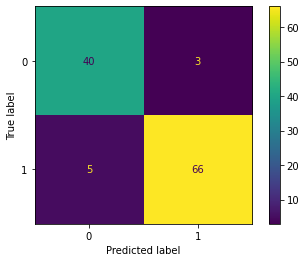

0.9298245614035088
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(Regression, X_test, y_test)
plt.show()
print(accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred, labels=[0, 1]))

## Optimization (8 points)

The following plot was generated by running a linear SVM using the following parameters:

`SGDClassifier(loss='hinge', learning_rate = 'constant', eta0 = e, n_iter_no_change = 100, max_iter=10000, random_state=5, verbose=1)`

Where e for eta0 (the learning rate) was varied as one of the following values: `[0.0001, 0.001, 0.01, 0.1, 1]`

The plot shows the loss of the model as it is being trained.

Explain why different values for the learning rate lead to such different loss curves, and make an argument for which value of eta0 you think is the best (several of the values are reasonable, so this mostly about making an argument rather than picking the right value).







Answer: The goal of optimization is to minimize or maximize an objective function. In this case or gradient decent, we should try to minimize loss.  A large learning rate will speed up the learning proccess but can cause failure to converge to a minimum like in the case of 1 and 0.1.  A small learning rate will take a longer time but it will be more reliable.  Personally, I think the learning rate of 0.01 is the optimal learning rate.  This is because this is the largest learning rate where the algorithm does converge to a miniumum.  Although the smaller learning rates will be more reliable as the epochs increase, they take more epochs to get close to the minimum and therefore are ineffieict at minimizing loss initially.  Ideally, the learning rate should start large (around 0.1) and decrease thoughout training.

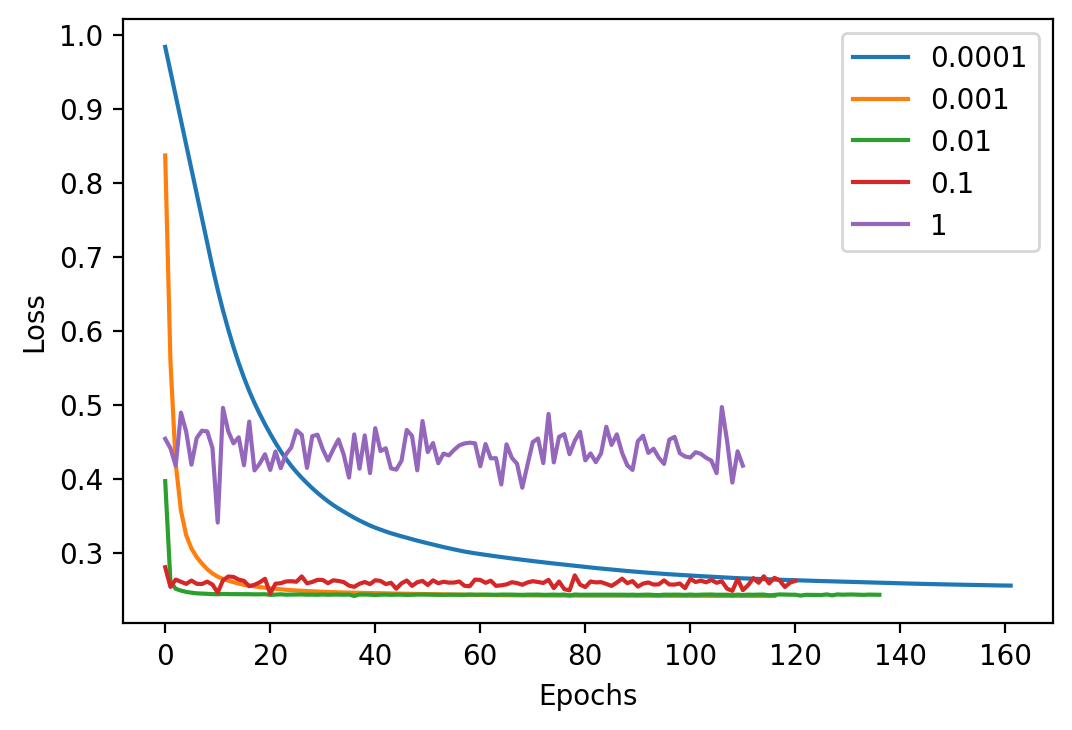

## Classifier Performance Comparison (16 points)

Scikit-learn contains a function for creating artificial datasets - `sklearn.datasets.make_classification`. Use this function to generate a dataset with two features, X1 and X2, and a y with four classes, as following:

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features = 2, n_redundant=0, n_classes=4, n_clusters_per_class = 1, random_state=5)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.7, random_state=5)

### 1. Plot the data (3 points)

Plot the data (the full data prior to the train/test split) in a scatterplot so that X1 is on the x-axis, X2 is on the y-axis, and y is displayed in color.

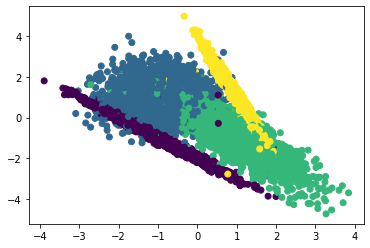

In [ ]:
X1 = X[:,0]
X2 = X[:,1]
plt.scatter(X1, X2, c = y)

**bold text**### 2. Model accuracy comparison (7 points)

Then try the following classification models on the data: Logistic regression, Gaussian Naive Bayes, Random Forest Classifier, and a Radial Basis Function SVM (you get this when you use [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with the default parameters). Assess model performance in terms of accuracy. How do the models rank in terms of accuracy?

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import sklearn
from sklearn.naive_bayes import GaussianNB

RFclf = RandomForestClassifier()
RFclf.fit(X_train, y_train)
predicted1 = RFclf.predict(X_test)
print('Random Forest accaccuracy score:')
print(accuracy_score(y_test, predicted1))

LRclf = LogisticRegression()
LRclf.fit(X_train, y_train)
predicted2 = LRclf.predict(X_test)
print('\nLogistic Regression accaccuracy score:')
print(accuracy_score(y_test, predicted2))

SVMclf = sklearn.svm.SVC()
SVMclf.fit(X_train, y_train)
predicted3 = SVMclf.predict(X_test)
print('\nSVM accaccuracy score:')
print(accuracy_score(y_test, predicted3))

NBclf = GaussianNB()
NBclf.fit(X_train, y_train)
predicted4 = NBclf.predict(X_test)
print('\nNaive Bayes accaccuracy score:')
print(accuracy_score(y_test, predicted4))

print('\nThe closer the accuracy score is to 1 the better.  Thus the best model would be SVM, then Random Forest, Logistic Regression, and finally Naive Bayes.')

Random Forest accaccuracy score:
0.9288571428571428

Logistic Regression accaccuracy score:
0.9111428571428571

SVM accaccuracy score:
0.9301428571428572

Naive Bayes accaccuracy score:
0.8268571428571428

The closer the accuracy score is to 1 the better.  Thus the best model would be SVM, then Random Forest, Logistic Regression, and finally Naive Bayes.


###3. Model speed comparison (3 points)
Another important difference between models is how long it takes for them to be fitted. Fit each of the four models again (only the fit function) and measure how long it takes. You can do this using the process_time function from the time module, as described below. Rank the models in terms of their speed.

In [ ]:
from time import process_time

t = process_time()
RFclf.fit(X_train, y_train)
elapsed_time = process_time() - t
print('Random Forest time:')
print(elapsed_time)

t = process_time()
LRclf.fit(X_train, y_train)
elapsed_time = process_time() - t
print('\nLogistic Regression time:')
print(elapsed_time)

t = process_time()
SVMclf.fit(X_train, y_train)
elapsed_time = process_time() - t
print('\nSVM time:')
print(elapsed_time)

t = process_time()
NBclf.fit(X_train, y_train)
elapsed_time = process_time() - t
print('\nNaive Bayes time:')
print(elapsed_time)

print('\nThe ranking of speed from fastest to slowest would be Naive Bayes, Logistic Regression, SVM, and Random Forest.')

Random Forest time:
0.5142165789999922

Logistic Regression time:
0.044657277000013096

SVM time:
0.07874821400000087

Naive Bayes time:
0.004075821999990126

The ranking of speed from fastest to slowest would be Naive Bayes, Logistic Regression, SVM, and Random Forest.


### 4. Modify `flip_y` and re-assess performance (3 points)

Re-generate the dataset with make_classification (and then also do the train/test split again), keeping all the parameters the same - with one exception. Set `flip_y` to `0.3` instead of its default of `0.01`. Run the models again and assess accuracy. Why does accuracy become worse? Hint: plot the data again.

Random Forest accaccuracy score:
0.6817142857142857

Logistic Regression accaccuracy score:
0.698

SVM accaccuracy score:
0.7278571428571429

Naive Bayes accaccuracy score:
0.6505714285714286


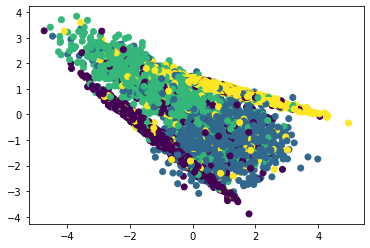

In [ ]:
X, y = make_classification(n_samples=10000, n_features = 2, n_redundant=0, n_classes=4, n_clusters_per_class = 1, random_state=5, flip_y = 0.3)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.7, random_state=5)

X1 = X[:,0]
X2 = X[:,1]
plt.scatter(X1, X2, c = y)

RFclf = RandomForestClassifier()
RFclf.fit(X_train, y_train)
predicted1 = RFclf.predict(X_test)
print('Random Forest accaccuracy score:')
print(accuracy_score(y_test, predicted1))

LRclf = LogisticRegression()
LRclf.fit(X_train, y_train)
predicted2 = LRclf.predict(X_test)
print('\nLogistic Regression accaccuracy score:')
print(accuracy_score(y_test, predicted2))

SVMclf = sklearn.svm.SVC()
SVMclf.fit(X_train, y_train)
predicted3 = SVMclf.predict(X_test)
print('\nSVM accaccuracy score:')
print(accuracy_score(y_test, predicted3))

NBclf = GaussianNB()
NBclf.fit(X_train, y_train)
predicted4 = NBclf.predict(X_test)
print('\nNaive Bayes accaccuracy score:')
print(accuracy_score(y_test, predicted4))


flip_y determines the amount of additional noise.  As it is increased from 0.1 to 0.3, more noise is added and models become less accurate.

## Spam Classification (26 points)

In natural language processing, most datasets can be downloaded through the datasets library. Here, we will use this to download a dataset for classifying whether an SMS text is spam or not.

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_dataset
dataset = load_dataset("sms_spam")
d = dataset['train'].to_pandas()
import sklearn.model_selection as ms
train, test = ms.train_test_split(d, test_size=0.5, random_state=5)

  0%|          | 0/1 [00:00<?, ?it/s]

###1. Investigate the dataset (5 points)
1. The labels are 0 and 1. Which label is spam, and which is not spam? (1 point)

0 is not spam and 1 is spam.


2. How many messages in the training set are spam? How many messages in the test set are spam? (1 point)

747 messages are spam and 4827 messages are not spam

3. What is the most common word in the training set and how many times does it occur? Hint: The easiest way to do this starts with turning the training texts into a document-term matrix. (3 points)

The most common word is "to" and it is present 2,253 times.

In [ ]:
d.head(20)

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [ ]:
print("Data set shape: ")
print(d.shape)
print()

dspam = d[d['label'] == 1]
dnotspam = d[d['label'] == 0]

print("Spam set shape: ")
print(dspam.shape)
print()

print("Non-Spam set shape: ")
print(dnotspam.shape)

Data set shape: 
(5574, 2)

Spam set shape: 
(747, 2)

Non-Spam set shape: 
(4827, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

dDocText = vectorizer.fit_transform(d['sms'])

dDocTextframe = pd.DataFrame(data = dDocText.toarray(),
                      columns = vectorizer.get_feature_names())
sum = dDocTextframe.sum()

most = sum.nlargest(1)
print(most)

to    2253
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###2. Train a random forest classifier (7 points)
Train a random forest classifier on the training set to predict whether an SMS is spam. Use the default settings and `random_state=5`. What is the accuracy on the test set?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

y = d["label"]
X = dDocText
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.4, random_state=5)

text_clf = RandomForestClassifier(random_state=5)
text_clf.fit(X_train, y_train)

y_pred = text_clf.predict(X_test)

print('The accuracy is:')
print(metrics.accuracy_score(y_test, y_pred))

The accuracy is:
0.9704035874439462


### 3. Investigate your model's errors (8 points)
1.   For which class (spam or not spam) is the model more unreliable? (2 points)
2.   What kind of error (false positive/negative) is more common for messages classified as spam? (2 points)
3.   In addition to [predict](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict), which gives an outright prediction, you can also use [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba), which will give you the probability for a test sample to be either not spam or spam. You get two columns, one for not spam and one for spam. These probabilities effectively express how confident the model is in its prediction. Print out the texts which the model predicted to be not spam with a probability of at least 0.9, that are nevertheless actually spam. (4 points)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


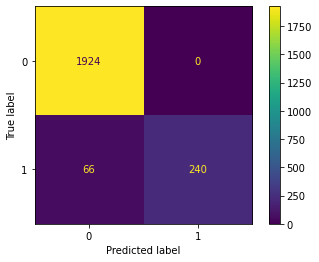

0.9704035874439462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1924
           1       1.00      0.78      0.88       306

    accuracy                           0.97      2230
   macro avg       0.98      0.89      0.93      2230
weighted avg       0.97      0.97      0.97      2230

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(text_clf, X_test, y_test)
plt.show()

print(accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred, labels=[0, 1]))
print(y_pred)

It is more unreliable when flagging [spam](https://). False negatives were the more common message when classified as spam.  It seemed to have gotten more flase negatives in the sam category, according to the recall, than anything else.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

y = d["label"]
X = dDocText
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.4, random_state=5)

text_clf = RandomForestClassifier(random_state=5)
text_clf.fit(X_train, y_train)

y_predprob = text_clf.predict_proba(X_test)
print(y_predprob)
print(y_predprob.shape)

dnpy = pd.DataFrame.to_numpy(d)
print(dnpy)

i = 0
j = 0
while i < len(y_predprob):
  if (y_predprob[i][0] >= 0.9 and dnpy[i][1] == 1):
    print(dnpy[i][0])
    j+= 1
  i+=1
print(j)
print(i)

[[0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]]
(2230, 2)
[['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'
  0]
 ['Ok lar... Joking wif u oni...\n' 0]
 ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"
  1]
 ...
 ['Pity, * was in mood for that. So...any other suggestions?\n' 0]
 ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free\n"
  0]
 ['Rofl. Its true to its name\n' 0]]
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

WINNER!! As a valued netw

### 4. Make the spam classifier more cautious (6 points)
1. Print out how many messages are classified as spam.  (1 point)
2. Make the spam classifier more cautious so that it only classifies a message as spam if it has a predicted probability of 0.7 or greater of being spam. Note that this is not an option in scikit-learn - you will have to check which predicted probabilities are >=0.7, and classify those as spam, and classify everything else as not spam.  (3 points)
3. Compared to before, how many messages are classified as spam now? (1 point)
4. If we were building a real spam classifier, why would we want make it more cautious? (1 point)

In [ ]:
import numpy as np
print(y_pred.tolist().count(1))
newy_pred = np.empty(1, int)
i = 0
while i < len(y_predprob):
  if (y_predprob[i][1] >= 0.7):
    newy_pred = np.append(newy_pred, np.array([1]), axis=0)
  else:
    newy_pred = np.append(newy_pred, np.array([0]), axis=0)
  i += 1
print(newy_pred.tolist().count(1))



240
185


3. Now, 185 calls are classified as spam compared to 240 before.  

4. A more cautious spam classifier is advantagious because it is problematic when spam messeges analyzed because this takes time and power from the computer and it also skews data.
